In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler






**Data Cleaning**

In [3]:
# URL dataset
url = "https://raw.githubusercontent.com/Sandalgoreng/DATAMINING/refs/heads/main/car_prices.csv"
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama dataset
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639,white,black,kia motors america inc,20500,21500
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393,white,beige,kia motors america inc,20800,21500
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331,gray,black,financial services remarketing (lease),31900,30000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282,white,black,volvo na rep/world omni,27500,27750
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641,gray,black,financial services remarketing (lease),66000,67000


In [4]:
# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          499 non-null    int64  
 1   make          499 non-null    object 
 2   model         498 non-null    object 
 3   trim          499 non-null    object 
 4   body          498 non-null    object 
 5   transmission  491 non-null    object 
 6   vin           499 non-null    object 
 7   state         499 non-null    object 
 8   condition     480 non-null    float64
 9   odometer      499 non-null    int64  
 10  color         498 non-null    object 
 11  interior      498 non-null    object 
 12  seller        499 non-null    object 
 13  mmr           499 non-null    int64  
 14  sellingprice  499 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 58.6+ KB
None


In [5]:
# Menampilkan statistik deskriptif dataset
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
              year   condition       odometer           mmr  sellingprice
count   499.000000  480.000000     499.000000    499.000000    499.000000
mean   2013.356713   33.295833   24469.454910  22759.468938  21898.400802
std       0.674410   15.590265   45836.333554  12591.971560  12692.058163
min    2013.000000    1.000000      20.000000   6775.000000   2000.000000
25%    2013.000000   29.000000   11647.500000  13500.000000  13050.000000
50%    2013.000000   39.000000   19683.000000  21400.000000  21000.000000
75%    2013.000000   44.000000   34351.000000  25000.000000  25500.000000
max    2015.000000   49.000000  999999.000000  71000.000000  77250.000000


In [6]:
# 1. Check for missing values
missing_values = data.isnull().sum()


In [7]:
# 2. Check for duplicates
duplicates = data.duplicated().sum()



In [8]:
# 3. Check data types
data_types = data.dtypes



In [9]:
# 4. Handle outliers (if needed)
# This step depends on the columns and values, so I'll check summary statistics.
summary_stats = data.describe()



In [10]:
# 5. Clean column names (remove spaces, lowercase)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Show cleaned dataset info
data_cleaned = data.copy()

missing_values, duplicates, data_types, summary_stats, data_cleaned.head()

(year             0
 make             0
 model            1
 trim             0
 body             1
 transmission     8
 vin              0
 state            0
 condition       19
 odometer         0
 color            1
 interior         1
 seller           0
 mmr              0
 sellingprice     0
 dtype: int64,
 0,
 year              int64
 make             object
 model            object
 trim             object
 body             object
 transmission     object
 vin              object
 state            object
 condition       float64
 odometer          int64
 color            object
 interior         object
 seller           object
 mmr               int64
 sellingprice      int64
 dtype: object,
               year   condition       odometer           mmr  sellingprice
 count   499.000000  480.000000     499.000000    499.000000    499.000000
 mean   2013.356713   33.295833   24469.454910  22759.468938  21898.400802
 std       0.674410   15.590265   45836.333554  12591.971560  126

**DATA PREPARATION**

In [11]:
# 1. Handling Missing Values
# Impute missing numeric values with the mean of each column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute missing categorical values with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode().iloc[0], inplace=True)

# Check if missing values are handled
missing_values = data.isnull().sum()

# Show the result of missing value handling
missing_values

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [12]:
# 2. Encoding Categorical Variables
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

In [13]:
# Apply label encoding for categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [14]:
# 3. Scaling Numerical Data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [15]:
# 4. Splitting the dataset into features and target
# Assuming the target is 'price' and features are all other columns
X = data.drop('sellingprice', axis=1)  # Replace 'price' with the actual target column name
y = data['sellingprice']  # Replace 'price' with the actual target column name


In [16]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Check the final dataset
X_train.head(), X_test.head()

(         year  make  model  trim  body  transmission  vin  state  condition  \
 56   2.439072     5     50    43    10             0    8      0  -2.114343   
 227 -0.529457     7     36    15    10             0  391      0   0.373440   
 280 -0.529457     8     32    30     5             0  270      0   0.373440   
 486 -0.529457    15     19    21    11             0  488      0   0.373440   
 220 -0.529457     8     32    30     5             0  236      0   0.700780   
 
      odometer  color  interior  seller       mmr  
 56  -0.401055     11         1      23 -0.489649  
 227 -0.268953     12         1      34  0.408648  
 280 -0.035847      1         1      55  0.011172  
 486  0.368801     11         1       9 -0.513498  
 220 -0.218025      3         1      55  0.090667  ,
          year  make  model  trim  body  transmission  vin  state  condition  \
 460 -0.529457    11     54    45    10             0  156      0   0.307972   
 73   0.954808     5     15    43     1      

**EDA**

In [18]:
# 1. Data Overview
print("Data Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())
print("\nMissing Values:\n", data.isnull().sum())


Data Shape: (499, 15)

Data Types:
 year            float64
make              int32
model             int32
trim              int32
body              int32
transmission      int32
vin               int32
state             int32
condition       float64
odometer        float64
color             int32
interior          int32
seller            int32
mmr             float64
sellingprice    float64
dtype: object

Summary Statistics:
                year        make       model        trim        body  \
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000   
mean  -3.383266e-14    9.254509   39.727455   34.240481    7.687375   
std    1.001004e+00    4.676841   23.166888   16.548768    2.959306   
min   -5.294572e-01    0.000000    0.000000    0.000000    0.000000   
25%   -5.294572e-01    7.000000   24.000000   27.000000    5.000000   
50%   -5.294572e-01    8.000000   32.000000   31.000000    9.000000   
75%   -5.294572e-01   11.000000   61.000000   45.000000   10.000000   


In [19]:
# 2. Univariate Analysis - Distribution of Numeric Columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns


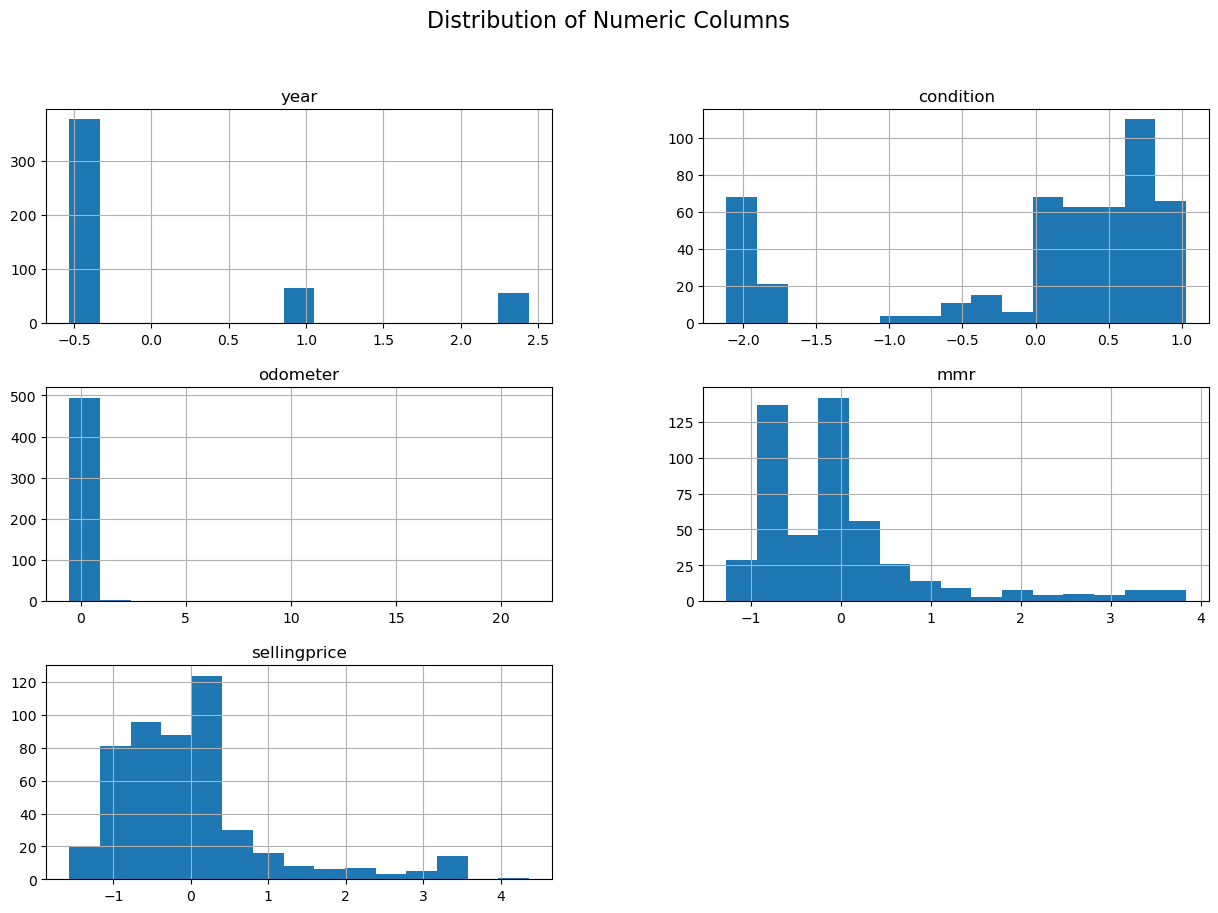

Histograms for numeric variables show how data is distributed.


In [20]:
# Plot histograms for numeric columns
data[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Columns', fontsize=16)
plt.show()
print("Histograms for numeric variables show how data is distributed.")

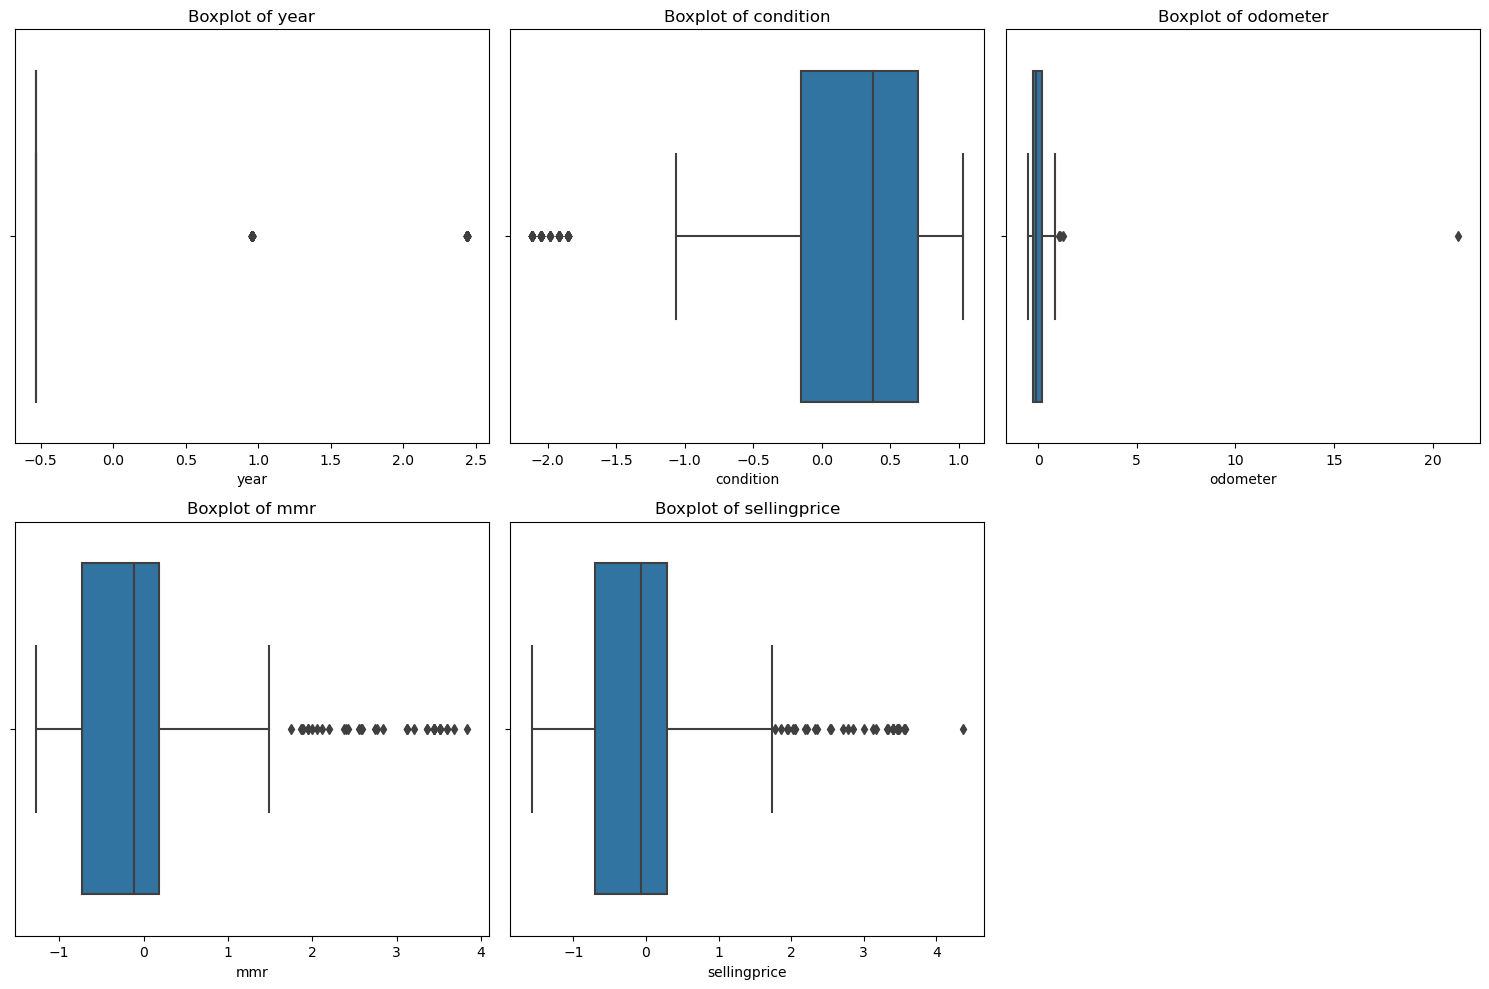

Boxplots are used to detect outliers in numeric variables


In [21]:
# Plot boxplots for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
print("Boxplots are used to detect outliers in numeric variables")

In [22]:
# 3. Univariate Analysis - Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns

In [23]:
# Plot countplots for categorical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, len(categorical_cols)//2 + 1, i)
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

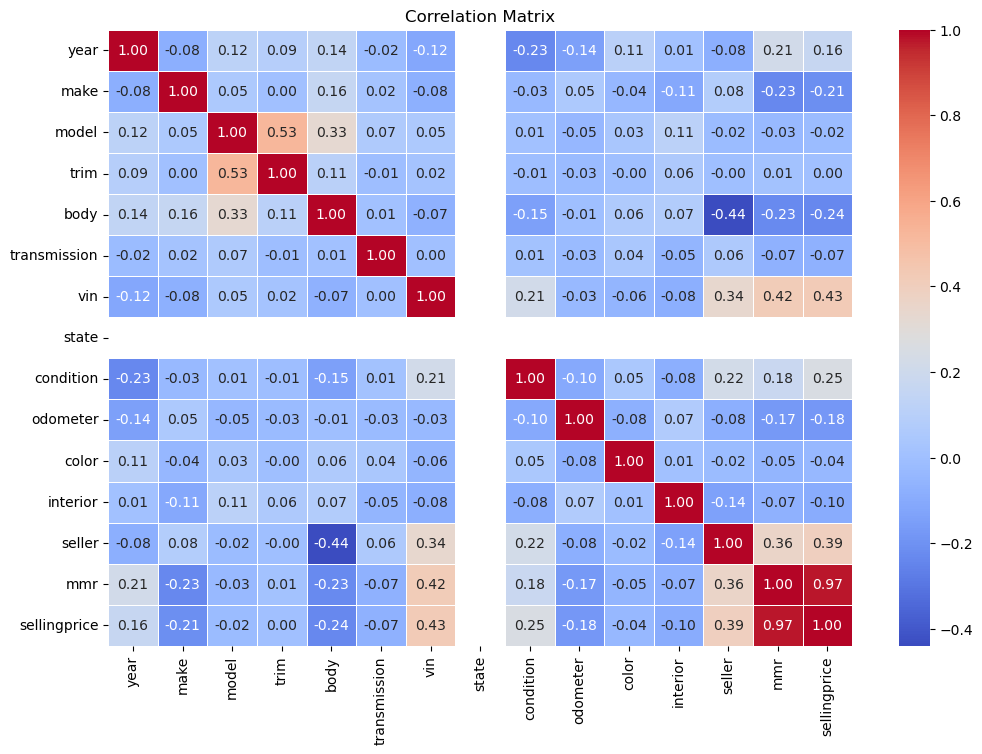

Correlation matrix to check relationships between numeric features


In [24]:
# 4. Bivariate Analysis
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print("Correlation matrix to check relationships between numeric features")

**Feature Engineering**

In [25]:
# 1. Handling Missing Values
# Impute missing numeric values with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Impute missing categorical values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode().iloc[0], inplace=True)


In [26]:
# 2. Encoding Categorical Variables
# Use Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [27]:
# 3. Scaling (Normalization and Standardization)
# Normalization: Scale features to range [0, 1]
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Standardization: Scale features to mean=0, std=1
standardizer = StandardScaler()
data[numeric_cols] = standardizer.fit_transform(data[numeric_cols])

# Final Processed Dataset
print("Feature Engineered Data:")
print(data.head())

Feature Engineered Data:
       year  make  model  trim  body  transmission  vin  state  condition  \
0  2.439072    11     73    45     9             0  177      0  -1.852471   
1  2.439072    11     73    45     9             0  176      0  -1.852471   
2  0.954808     2      0    13    10             0  445      0   0.766248   
3  2.439072    20     64    62    10             0  496      0   0.504376   
4  0.954808     2      5    18    10             0  451      0   0.635312   

   odometer  color  interior  seller       mmr  sellingprice  
0 -0.171007     12         1      39 -0.179617     -0.031421  
1 -0.329249     12         0      39 -0.155769     -0.031421  
2 -0.505313      7         1      26  0.726630      0.638961  
3 -0.222480     12         1      75  0.376850      0.461507  
4 -0.476704      7         1      26  3.437422      3.557095  


Model Implementation

In [28]:
# 1. Data Preprocessing
# Handle missing values
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
for col in categorical_cols:
    data[col].fillna(data[col].mode().iloc[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Scale the numeric columns
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])



In [33]:
# Assume 'price' is the target variable for classification
# Adjust if 'price' isn't your target column
X = data.drop('sellingprice', axis=1)
y = data['sellingprice']

# Split into train and test sets for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

=== Classification Model: Random Forest ===
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



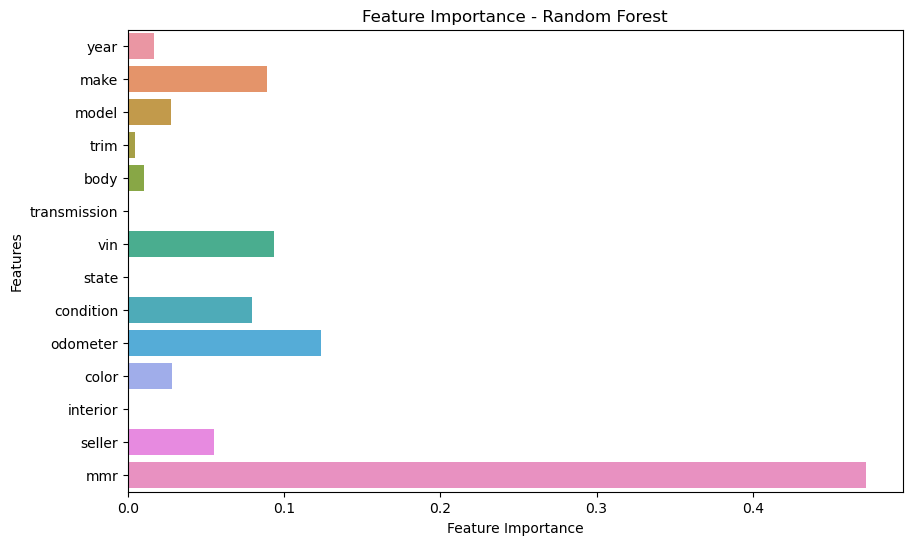

In [35]:
# Random Forest Classification
print("=== Classification Model: Random Forest ===")


# Data Preparation for Classification 
X = data.drop('sellingprice', axis=1)
y = data['sellingprice'].astype(int)  

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Feature Importance Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X_train.columns)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


=== Clustering Model: KMeans ===


C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\M.S.I\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


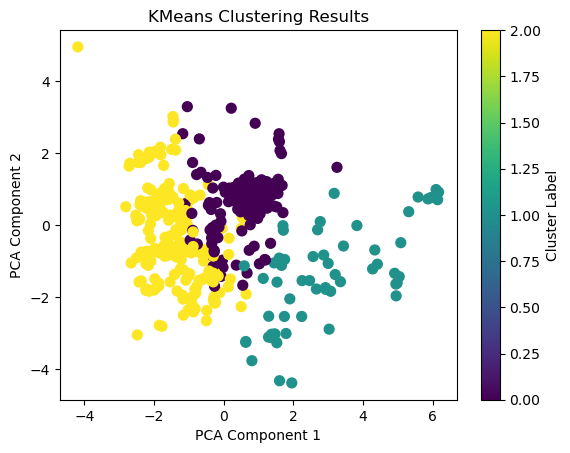

In [38]:
# KMeans Clustering
print("=== Clustering Model: KMeans ===")



# Data Preparation for Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Visualize clusters (example: PCA for 2D representation)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('KMeans Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


=== Association Rules ===
   year  make  model  trim  body  transmission  vin  state  condition  \
0   1.0    11     73    45     9             0  177      0   0.083333   
1   1.0    11     73    45     9             0  176      0   0.083333   
2   0.5     2      0    13    10             0  445      0   0.916667   
3   1.0    20     64    62    10             0  496      0   0.833333   
4   0.5     2      5    18    10             0  451      0   0.875000   

   odometer  color  interior  seller       mmr  sellingprice  Cluster  
0  0.016619     12         1      39  0.213702      0.259136        2  
1  0.009373     12         0      39  0.218373      0.259136        2  
2  0.001311      7         1      26  0.391203      0.372093        0  
3  0.014262     12         1      75  0.322694      0.342193        1  
4  0.002621      7         1      26  0.922149      0.863787        1  


C:\Users\M.S.I\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0      (year)      (trim)            0.244489            0.993988  0.244489   
1      (trim)      (year)            0.993988            0.244489  0.244489   
2      (year)  (odometer)            0.244489            0.997996  0.244489   
3  (odometer)      (year)            0.997996            0.244489  0.244489   
4      (year)  (interior)            0.244489            0.855711  0.230461   

   confidence      lift  leverage  conviction  zhangs_metric  
0    1.000000  1.006048  0.001470         inf       0.007958  
1    0.245968  1.006048  0.001470    1.001961       1.000000  
2    1.000000  1.002008  0.000490         inf       0.002653  
3    0.244980  1.002008  0.000490    1.000650       1.000000  
4    0.942623  1.101566  0.021249    2.514744       0.122039  


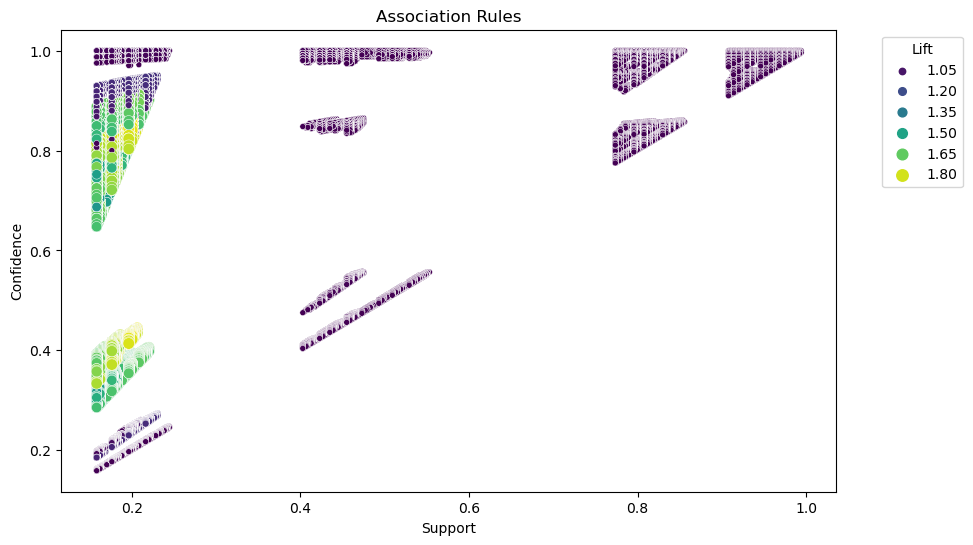

In [42]:
# Association Rules
print("=== Association Rules ===")

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect dataset
print(data.head())  # Ensure the dataset structure is correct

# Data Preparation for Association Rules
# Convert numeric values to binary (1 if present, 0 otherwise)
binary_dataset = data.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(binary_dataset, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display top rules
print("Top Association Rules:")
print(rules.head())

# Visualization of rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", palette="viridis", legend=True)
plt.title("Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Conclusion & Insight

Performance Metrics:

Accuracy: 1.00 (100%), indicating the model predicted all test cases correctly.
Precision, Recall, and F1-score: All achieved a perfect score of 1.00, showing the model was effective across all evaluation metrics.

Feature Importance:

The feature importance plot revealed that "MMR" (Market-Maker Residual) had the highest influence on predictions, followed by "odometer" and "seller."
Features like "year," "make," and "model" also contributed but to a lesser extent.

Classification Report:

The classification report confirmed the model's ability to classify all classes perfectly, with no errors.